In [1]:
from pydoc import describe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn import preprocessing


import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols



In [2]:
#Lecture des données
data = pd.read_excel("/home/congo/Bureau/2022-m1-staps/data_motives/data_motives_final.xlsx","haller") 

In [3]:
# mise a zero des valeurs manquantes
data = data.fillna(0)

#stoker le nom des colonnes
column_name = [c for c in data]

In [4]:
data = data.to_numpy()
data = data[:,39:]
nlin ,ncol =data.shape
print('data' ,data.shape)

data (1075, 71)


##                            Preprosseccing

In [5]:
# rendre toute les valeurs positives
data_correct = data
data = np.absolute(data)

In [6]:
#Supression des valeurs abérantes par rapport au seuil
seuil = 5*np.std(data,axis=0,dtype = np.float64)
#print(seuil)
data = np.array(data)
data_tmp = np.zeros_like(data)
data_tmp[data < seuil] = data[data < seuil]
data = data_tmp
#print(data)

In [7]:
#normalisation par ligne (avec ecartype nul) our avoir des valeurs entre 0 et 1

#indices à suprimer
max = np.max(data,axis = 1)
indices = [i for i, e in enumerate(max) if e == 0]
#print(indices)

#suppression des lignes
data_del = np.delete(data,indices,axis = 0)
data = data_del

#normalisation par ligne sans ecartype nul pour avoir des valeurs entre 0 et 1
min = np.min(data,axis = 1)
max = np.max(data,axis = 1)
data = (data-min[:,np.newaxis])/max[:,np.newaxis]

#print(data)


In [8]:
import pandas as pd
import openpyxl

In [9]:
# retour des valeurs négatives

#suppression des lignes
data_del = np.delete(data_correct,indices,axis = 0)
data_correct = data_del

#print("data before = ", data[data < 0])

#indices des valeurs négatives
indices_val_neg_i = np.where(data_correct < 0)
#print("indices_val_neg_i = ",indices_val_neg_i)

data[indices_val_neg_i] = -1*data[indices_val_neg_i]


#print("data after = ", data[data < 0] )
nlin ,ncol =data.shape



 Cluster Algorithm 

## 1) CAH algorithm 

In [10]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd 


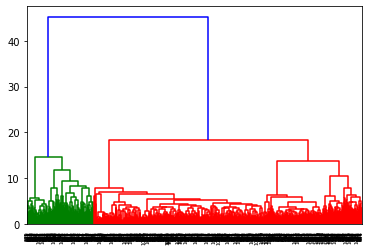

In [11]:
#create a dendrogram
dendrogram = sch.dendrogram(sch.linkage(data,method='ward'))

In [12]:
hc = AgglomerativeClustering(n_clusters=3,affinity= 'euclidean',linkage='ward' )


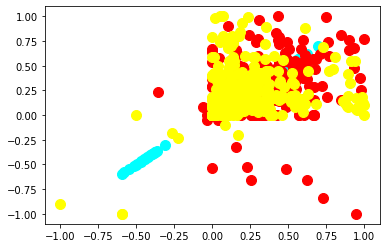

In [13]:
y_hc = hc.fit_predict(data)
plt.scatter(data[y_hc == 0,28],data[ y_hc == 0,28],s= 100,c = 'cyan')
plt.scatter(data[y_hc == 1,0],data[ y_hc == 1,1],s= 100,c = 'red')
plt.scatter(data[y_hc == 2,0],data[ y_hc == 2,1],s= 100,c = 'yellow')
plt.scatter(data[y_hc == 3,0],data[ y_hc == 3,1],s= 100,c = 'black')
plt.scatter(data[y_hc == 4,0],data[ y_hc == 4,1],s= 100,c = 'green')
plt.scatter(data[y_hc == 5,0],data[ y_hc == 5,1],s= 100,c = 'green')


## K-means

In [14]:
from sklearn.cluster import KMeans


Text(0, 0.5, ' Cout du modele inertia')

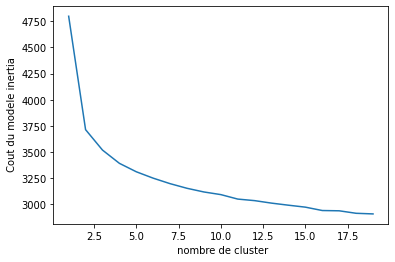

In [15]:
#nombre de cluster optimal 
# inertia calcule le cout (somme des distance entre les points d'un cluster et du centroide )
# methode shadow aur=tre indicateur
inertia =[]
K_range =range(1,20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(data)
    inertia.append(model.inertia_)


plt.plot(K_range,inertia)
plt.xlabel(" nombre de cluster")
plt.ylabel(" Cout du modele inertia")


# 2-6 clusters ? la zone de "coude"

Text(0.5, 0, " nombre d'étudiant")

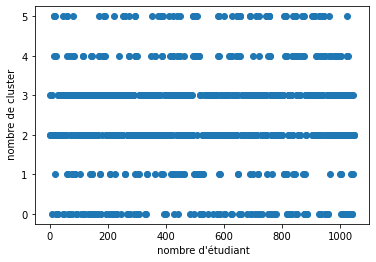

In [16]:
x_etudiant=range(0,nlin)

n_cluster = 6
model = KMeans(n_clusters= n_cluster)
y_pred = model.fit_predict(data)

plt.scatter(x_etudiant,y_pred)
plt.ylabel(" nombre de cluster")
plt.xlabel(" nombre d'étudiant")

##                            Statistique Inférentielle sur chaque cluster 1

In [17]:
# mettre data en df
df_cluster = pd.DataFrame(data)

df_cluster_const = df_cluster.astype(float,errors='raise')
# renommer les colonne
df_cluster.columns = column_name[39:]
df_cluster_const.columns = column_name[39:]
#print(df_cluster.shape)

# # création d'une colonne cluster 
df_cluster['cluster'] = y_pred
# #print(df_cluster.shape)

In [18]:
# df_cluster.groupby('cluster').describe()

In [19]:

y_pred_0 = np.zeros(len(y_pred), dtype= int)
y_pred_1 = np.zeros(len(y_pred), dtype= int)
y_pred_2 = np.zeros(len(y_pred), dtype= int)
y_pred_3 = np.zeros(len(y_pred), dtype= int)
y_pred_4 = np.zeros(len(y_pred), dtype= int)
y_pred_5 = np.zeros(len(y_pred), dtype= int)

# print(y_pred[ y_pred == 5])

for i in range (len(y_pred)) :
    if ( y_pred[i] == 0) :
        y_pred_0[i] = 1 
    if ( y_pred[i] == 1) :
        y_pred_1[i] = 1 

    if ( y_pred[i] == 2) :
        y_pred_2[i] = 1 

    if ( y_pred[i] == 3) :
        y_pred_3[i] = 1 

    if ( y_pred[i] == 4) :
        y_pred_4[i] = 1 

    if ( y_pred[i] == 5) :
        y_pred_5[i] = 1
             
        
# print(y_pred_5[y_pred_5 == 1])

# # création d'une colonne cluster0 ,1 ,2  
df_cluster['cluster_0'] = y_pred_0
df_cluster['cluster_1'] = y_pred_1
df_cluster['cluster_2'] = y_pred_2
df_cluster['cluster_3'] = y_pred_3
df_cluster['cluster_4'] = y_pred_4
df_cluster['cluster_5'] = y_pred_5

# print(df_cluster.shape)


In [20]:
# 'Confiance en soi' par 'Confiance_en_soi'
# print(column_name[90])
column_name[90] = 'Confiance_en_soi'
# print(column_name[90])
df_cluster = df_cluster.rename(columns={'Confiance en soi':'Confiance_en_soi'}) 

# print(df_cluster['Confiance_en_soi'])

In [21]:
# df_cluster.info()
# probleme de type alors on le change
df_cluster = df_cluster.astype(float,errors='raise')
# df_cluster.info()

renommer les lignes ( remplacer 0 par etudiant0)

In [22]:
line_name = ['etudiant' + str(i) for i in range(nlin)]
# print(line_name)
df_cluster.index = line_name
df_cluster_const.index = line_name
# print(df_cluster)

In [23]:
with pd.ExcelWriter('test.xlsx') as writer:
    df_cluster.to_excel(writer, freeze_panes=(1,1))

In [24]:
# Çağatay Demiralp <cagatay@cs.stanford.edu>

In [25]:
import statsmodels.formula.api as smf


In [26]:
# "cluster_0 ~ detente + Confort + .... "

List_qualif = column_name[39:]
chaine = "cluster_0 ~ "
for qualif in List_qualif : # pour chaque qualité 
    chaine += '+'
    chaine +=  str(qualif) 

# print(chaine)

In [27]:

model = smf.ols(chaine, data=df_cluster).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              cluster_0   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     9.132
Date:                Wed, 18 May 2022   Prob (F-statistic):           2.15e-68
Time:                        17:28:38   Log-Likelihood:                 19.656
No. Observations:                1050   AIC:                             104.7
Df Residuals:                     978   BIC:                             461.6
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1804      0.021  

## OLS with dummy variables

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [29]:
# rendre y_pred_0 en dummy variables ???

dummy = pd.get_dummies(y_pred).values
# print(dummy)

cluster 0

In [30]:

model = sm.OLS(y_pred_0, df_cluster_const)
results = model.fit()
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.420
Model:                            OLS   Adj. R-squared (uncentered):              0.377
Method:                 Least Squares   F-statistic:                              9.966
Date:                Wed, 18 May 2022   Prob (F-statistic):                    3.07e-75
Time:                        17:28:38   Log-Likelihood:                         -19.896
No. Observations:                1050   AIC:                                      181.8
Df Residuals:                     979   BIC:                                      533.7
Df Model:                          71                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [31]:
print("Parameters: \n", results.params.sort_values())

Parameters: 
 Galbant       -0.185214
Performance   -0.172397
Nouveaute     -0.099409
Challenge     -0.094728
Progression   -0.090627
                 ...   
Lassitude      0.137649
Competition    0.149186
Energie        0.195316
Objectif       0.210512
Technicite     0.233974
Length: 71, dtype: float64


In [32]:
print("R2: ", results.rsquared)

R2:  0.41952920664769844


In [33]:
print("Standard errors: ", results.bse.sort_values())

Standard errors:  Stretchcing       0.023784
Role              0.026477
Individualiste    0.027372
detente           0.029524
Galbant           0.030167
                    ...   
Se_defouler       0.058579
Puissance         0.060886
Muscle            0.061071
Energie           0.062729
Competition       0.065421
Length: 71, dtype: float64


##                            Statistique Inférentielle sur chaque cluster 2

Fval et pval

In [54]:
# quels qualif influence le plus le partitionnement
from sklearn.feature_selection import f_classif
F,pval = f_classif(df_cluster,y_pred)
df_List_qualif = df_cluster.columns

df_pval_and_qualif = pd.DataFrame(pval,index = df_List_qualif,columns= ['pval'])
# print(df_pval_and_qualif)

#trier des valeurs 
df_pval_and_qualif = df_pval_and_qualif.sort_values(by = 'pval')

# print(df_pval_and_qualif[15])



/home/congo/.local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [55]:
# es -ce ca la bonne question : comment evolue les clusters par rapports au qualificatif ??

# on cherche a analyser l'influence des qualifiquatif sur chaque cluster

In [56]:
# plt.scatter(df_cluster.loc[:,'Galbant'],df_cluster.loc[:,'Stretchcing'],c=df_cluster.loc[:,'cluster'])


In [57]:
# "cluster ~ detente + Confort + .... "

List_qualif = column_name[39:]
chaine = "cluster ~ "
for qualif in List_qualif : # pour chaque qualité 
    chaine += '+'
    chaine +=  str(qualif) 
    model = ols(chaine, data=df_cluster).fit()
aov_table = sm.stats.anova_lm(model, typ=3)
# print(aov_table)



In [58]:
# "cluster ~ detente "  et conservation de pval <  0.05

List_pval_and_qualif = []
List_pval = []
df_List_qualif = []
List_qualif = column_name[39:]
chaine = ''
for qualif in List_qualif : # pour chaque qualité 
    chaine = "cluster ~ "
    chaine +=  str(qualif)
    model = ols(chaine, data=df_cluster).fit()
    chaine = ''
    aov_table = sm.stats.anova_lm(model, typ=3)
    # aov_table = aov_table.to_numpy()
    pval = aov_table.loc[str(qualif),'PR(>F)']
    if pval < 0.05:
        List_pval.append(pval)
        df_List_qualif.append(qualif)
        


# on affiche les qualif qui influence le plus le cluster   

df_pval_and_qualif = pd.DataFrame(List_pval,index = df_List_qualif,columns= ['pval'])
# print(df_pval_and_qualif.sort_values(by = 'pval'))


# les variables les moins important
#print(len(df_List_qualif), len(List_qualif))

# print(set(List_qualif) - set(df_List_qualif))

In [59]:
chaine = "cluster ~ Confort"

model = ols(chaine, data=df_cluster).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
print(aov_table.shape)
print(aov_table)
aov_table = aov_table.to_numpy()
print(aov_table[1,3])

(3, 4)
                sum_sq      df            F         PR(>F)
Intercept  4890.473649     1.0  3201.778877  7.218299e-321
Confort     130.311158     1.0    85.314336   1.374330e-19
Residual   1600.740270  1048.0          NaN            NaN
1.374330414319179e-19


In [60]:
# regresion logistic

In [61]:
# "cluster ~ detente "  et conservation de pval <  0.05

# List_pval_and_qualif = []
# List_pval = []
# df_List_qualif = []
# List_qualif = column_name[39:]
# chaine = ''
# for qualif in List_qualif : # pour chaque qualité 
#     chaine = "cluster ~ "
#     chaine +=  str(qualif)
#     chaine = ''
#     model = smf.logit(chaine, data = df_cluster).fit()
#     # aov_table = aov_table.to_numpy()
#     pval = model.loc[str(qualif),'PR(>F)']
#     if pval < 0.05:
#         List_pval.append(pval)
#         df_List_qualif.append(qualif)
        


# on affiche les qualif qui influence le plus le cluster   

df_pval_and_qualif = pd.DataFrame(List_pval,index = df_List_qualif,columns= ['pval'])
# print(df_pval_and_qualif.sort_values(by = 'pval'))


# les variables les moins important
#print(len(df_List_qualif), len(List_qualif))

# print(set(List_qualif) - set(df_List_qualif))

##   autres

In [62]:
#cluster 0
indices_cluster_0 = np.where(data[y_pred == 0])
cluster_0 = data[y_pred == 0]

# retour du df
df_0 = pd.DataFrame(cluster_0)
# prendre la valeur absolute pour éviter la compensation
df_0 = np.absolute(df_0)
df_0.columns = column_name[39:]
#print(df_0)

#statistique inférentielle sur chaque cluster 

# faire pour chaque cluster une statistique inférentielle 

# les mots qui caractérise les clusters

# trier par somme de toutes les colonnes
sum_colonne_0 = df_0.sum()
print(sum_colonne_0.sort_values(ascending=False))


Groupe         45.664533
Objectif       44.475991
Plaisir        42.653586
Partage        42.401593
Repetition     40.868134
                 ...    
Lent           22.880645
Douceur        22.388048
Lassitude      18.088251
Culpabilite    16.797691
Ennuyeux       16.220485
Length: 71, dtype: object


##                            fuzzy cluster

In [68]:
from fcmeans import FCM


In [69]:
n_cluster = 4
fcm = FCM(n_clusters= n_cluster)
# faire ça pour eviter les problemes de shape !!!
data = np.array(data, dtype=np.float64)
fcm.fit(data)

##expliquations :
# data = np.array(data)
#print(data.dtype)
#print(data.shape)
#arr = np.ones([1050,71])
#print(arr.shape)
#fcm.fit(data)

Text(0.5, 0, " nombre d'étudiant")

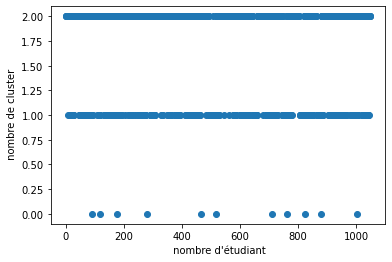

In [70]:
# outputs 
y_pred_centers = fcm.centers
y_pred = fcm.predict(data)


plt.scatter(x_etudiant,y_pred)
plt.ylabel(" nombre de cluster")
plt.xlabel(" nombre d'étudiant")

uniquement le centre des clusters !!!

In [71]:
#cluster 0
print(y_pred_centers.shape)
cluster_0 = y_pred_centers[0,:]
print(cluster_0)
# retour du df
df_0 = pd.DataFrame(cluster_0)
# prendre la valeur absolute pour éviter la compensation
df_0 = np.absolute(df_0)
# # ajouter les noms des colonnes
# df_0.columns = column_name[39:]


#print(df_0)

# trier les valeurs

print(df_0)


(4, 71)
[0.17186298 0.16058922 0.14506166 0.14179647 0.15844662 0.12624511
 0.12977828 0.12768375 0.12641762 0.18658273 0.16209295 0.1299802
 0.1754876  0.14699398 0.16003365 0.16431193 0.15318987 0.16445021
 0.18035807 0.16157726 0.17154038 0.1350741  0.21846953 0.19007859
 0.15183885 0.16064882 0.19110357 0.17146578 0.16399939 0.20681423
 0.17222805 0.15288651 0.2364455  0.22811996 0.1109746  0.15606763
 0.21101561 0.21018349 0.20822789 0.22509012 0.155934   0.14534268
 0.18469458 0.11161236 0.2380786  0.2209821  0.11605701 0.25502343
 0.26313218 0.20966284 0.10935109 0.26136238 0.25271968 0.15887255
 0.28401357 0.23637198 0.19764537 0.23965295 0.21542861 0.25446285
 0.20209564 0.23151474 0.15646233 0.31765065 0.27805846 0.25336592
 0.18107211 0.27599231 0.23109683 0.20773658 0.25189206]
           0
0   0.171863
1   0.160589
2   0.145062
3   0.141796
4   0.158447
..       ...
66  0.181072
67  0.275992
68  0.231097
69  0.207737
70  0.251892

[71 rows x 1 columns]


In [72]:
# setwd("C:/Users/cschnitzler/Dropbox/staps/2021 2022/stage/master cmsi/job congo")
# library(readxl)

# data_motus <- read_excel("data_motus.xlsx")

# library(FactoMineR)
# library(Factoshiny)
# PCAshiny(data_motus)

In [73]:
#cluster 0
indices_cluster_0 = np.where(data[y_pred == 0])
cluster_0 = data[y_pred == 0]

# retour du df
df_0 = pd.DataFrame(cluster_0)
# prendre la valeur absolute pour éviter la compensation
df_0 = np.absolute(df_0)
df_0.columns = column_name[39:]
#print(df_0)

# trier par somme de toutes les colonnes
sum_colonne_0 = df_0.sum()
print(sum_colonne_0)

Confort           1.976577
Securite          2.961201
Qualite           2.652902
Force             1.853212
Maintien          1.847638
                    ...   
Role              3.036756
Performance       2.006535
Meilleur          2.626739
Individualiste    2.489019
detente           2.654854
Length: 71, dtype: float64


## Tester la solidité de chaque cluster

In [81]:
df = pd.read_csv("/home/congo/Bureau/2022-m1-staps/data_motives/clustering.csv") 

In [82]:
df.drop(df.columns[[0]], axis = 1, inplace = True) 

In [83]:
df.head()

,cluster3,cluster4,cluster5,Confort,Securite,Qualite,Force,Maintien,Puissance,Competition,...,Serenite,Sexy,Plaisir,Groupe,Partage,Role,Performance,Meilleur,Individualiste,detente
0,1,1,1,0.072732,0.065028,0.079676,0.098327,0.029093,0.032083,0.030411,...,0.015611,0.079372,0.206386,0.169235,0.004866,0.031171,0.010998,0.035884,0.025494,0.024582
1,2,3,4,0.978229,0.256652,0.370343,0.252782,0.323174,0.327528,0.252540,...,0.017417,0.015723,0.019110,0.021287,0.021529,0.018868,0.021287,0.017900,0.024432,0.017658
2,1,1,1,0.070048,0.054323,0.062636,0.087573,0.090062,0.152751,0.101287,...,0.013713,0.285805,0.022343,0.007677,0.103828,0.133054,0.031556,0.070207,0.135014,0.175676
3,1,2,2,0.290419,0.741154,0.153511,0.216930,0.167392,0.185084,0.305117,...,0.136636,0.339412,0.185084,0.300490,0.092270,0.079750,0.236255,0.249864,0.272183,0.333696
4,1,1,1,0.029809,0.098887,0.045072,0.158585,0.116455,0.067727,0.050238,...,0.121065,0.029650,0.045072,0.216773,0.060254,0.059221,0.069078,0.077822,0.063037,0.159777


In [84]:
df_colonne = df.columns[ 3:]

données Train et validation

In [85]:
y_3 = df.loc[:,'cluster3']
y_4 = df.loc[:,'cluster4']
y_5 = df.loc[:,'cluster5']

In [86]:
X = df
X.drop(df.columns[[0,1,2]], axis = 1, inplace = True) 

# print(X)
# print(y_3)

In [94]:
from sklearn.model_selection import train_test_split
nelem = len(df)
X_train, X_test , y_train_3, y_test_3 = train_test_split (X,y_3, train_size = int(nelem*(2/3)), test_size = int(nelem*(1/3)),random_state = 0)
X_train_4, X_test_4 , y_train_4, y_test_4 = train_test_split (X,y_4, train_size = int(nelem*(2/3)), test_size = int(nelem*(1/3)),random_state = 0)
X_train_5, X_test_5 , y_train_5, y_test_5 = train_test_split (X,y_5, train_size = int(nelem*(2/3)), test_size = int(nelem*(1/3)),random_state = 0)




In [98]:
train_ratio = 0.80
test_ratio = 0.10
validation_ratio = 0.10

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y_3, test_size=test_ratio)
X_train_3, X_valid_3, y_train_3, y_valid_3 = train_test_split(X_train_3, y_train_3, test_size=validation_ratio/(train_ratio+test_ratio))


X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y_4, test_size=test_ratio)
X_train_4, X_valid_4, y_train_4, y_valid_4 = train_test_split(X_train_4, y_train_4, test_size=validation_ratio/(train_ratio+test_ratio))

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y_5, test_size=test_ratio)
X_train_5, X_valid_5, y_train_5, y_valid_5 = train_test_split(X_train_5, y_train_5, test_size=validation_ratio/(train_ratio+test_ratio))




In [88]:
# regresion logistic sur le train set
from sklearn.linear_model import LogisticRegression

In [89]:
logreg = LogisticRegression()
logreg_4 = LogisticRegression()
logreg_5 = LogisticRegression()
logreg.fit(X_train,y_train_3)
logreg_4.fit(X_train_4,y_train_4)
logreg_5.fit(X_train_5,y_train_5)

LogisticRegression()

In [90]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train,y_train_3)
y_pred_3_knn = knn.predict(X_test)
print( metrics.accuracy_score(y_test_3,y_pred_3_knn))

confusion = metrics.confusion_matrix(y_test_3, y_pred_3_knn)
print('confusion  \n' ,confusion)

NameError: name 'metrics' is not defined

In [ ]:
# prediction pour le donner val
y_pred_3_class = logreg.predict(X_test)
y_pred_4_class = logreg.predict(X_test_4)
y_pred_5_class = logreg.predict(X_test_5)

calcul de l'accuracy

In [ ]:
from sklearn import metrics
print( metrics.accuracy_score(y_test_3,y_pred_3_class))
print( metrics.accuracy_score(y_test_4,y_pred_4_class))
print( metrics.accuracy_score(y_test_5,y_pred_5_class))

0.9657142857142857
0.31142857142857144
0.2542857142857143


In [ ]:
# comparer true and predicted response values
print('True' , y_test_3.values[0:25])
print('True 4' , y_test_4.values[0:25])
print('True 5 ' , y_test_5.values[0:25])
# y_pred_3_class  = y_pred_3_class.to_numpy()

print('Pred' , y_pred_3_class[0:25])
print('Pred 4 ' , y_pred_4_class[0:25])
print('Pred 5 ' , y_pred_5_class[0:25])

True [1 3 1 1 3 1 1 1 1 3 1 3 2 1 1 1 3 1 1 2 1 1 1 1 1]
True 4 [2 4 1 1 4 1 1 2 1 4 2 4 3 2 1 1 4 1 2 3 2 2 2 1 2]
True 5  [2 5 1 1 5 1 1 2 1 5 2 5 4 2 1 1 5 1 2 4 2 2 2 1 2]
Pred [1 3 1 1 3 1 1 1 1 3 1 3 2 1 1 1 3 1 1 2 1 1 1 1 1]
Pred 4  [1 3 1 1 3 1 1 1 1 3 1 3 2 1 1 1 3 1 1 2 1 1 1 1 1]
Pred 5  [1 3 1 1 3 1 1 1 1 3 1 3 2 1 1 1 3 1 1 2 1 1 1 1 1]


In [ ]:
confusion = metrics.confusion_matrix(y_test_3, y_pred_3_class)
confusion_4 = metrics.confusion_matrix(y_test_4, y_pred_4_class)
confusion_5  = metrics.confusion_matrix(y_test_5, y_pred_5_class)
print('confusion  \n' ,confusion)
print('confusion 4 \n' ,confusion_4)
print('confusion 5 \n' ,confusion_5)

confusion  
 [[237   5   1]
 [  4  32   0]
 [  2   0  69]]
confusion 4 
 [[106   2   0   0]
 [131   3   1   0]
 [  4  32   0   0]
 [  2   0  69   0]]
confusion 5 
 [[ 86   0   0   0   0]
 [131   3   1   0   0]
 [ 20   2   0   0   0]
 [  4  32   0   0   0]
 [  2   0  69   0   0]]


In [ ]:
plt.matshow(confusion, cmap=plt.cm.gray)
plt.show()

In [ ]:
plt.matshow(confusion_4, cmap=plt.cm.gray)
plt.show()

In [ ]:
plt.matshow(confusion_5, cmap=plt.cm.gray)
plt.show()

In [191]:
print( 'recall_score : ',metrics.recall_score(y_test_3, y_pred_3_class,average=None))
print( 'recall_score 4 : ' ,metrics.recall_score(y_test_4, y_pred_4_class,average=None))
print( 'recall_score 5 : ' ,metrics.recall_score(y_test_5, y_pred_5_class,average=None))

recall_score :  [0.97530864 0.88888889 0.97183099]
recall_score 4 :  [0.98148148 0.02222222 0.         0.        ]
recall_score 5 :  [1.         0.02222222 0.         0.         0.        ]


In [192]:
print('precision_score :' ,metrics.precision_score(y_test_3, y_pred_3_class,average=None))
print('precision_score 4:' ,metrics.precision_score(y_test_4, y_pred_4_class,average=None))
print('precision_score 5:' ,metrics.precision_score(y_test_5, y_pred_5_class,average=None))

precision_score : [0.97530864 0.86486486 0.98571429]
precision_score 4: [0.43621399 0.08108108 0.         0.        ]
precision_score 5: [0.35390947 0.08108108 0.         0.         0.        ]


/home/congo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/congo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Explorator factor analysis

In [193]:
from factor_analyzer import FactorAnalyzer

In [194]:
fa = FactorAnalyzer(rotation=None)
fa.fit(df)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [195]:
fa.loadings_

array([[-1.72040126e-01,  4.30265763e-01, -1.65384610e-01],
       [-2.03713300e-01,  4.25257186e-01,  3.92747500e-03],
       [-5.77606442e-02,  4.07784671e-01, -2.14257776e-01],
       [-8.43186518e-02,  3.66473529e-01, -3.38550796e-01],
       [-1.00162047e-01,  4.13818217e-01, -2.21536483e-01],
       [ 4.17927278e-02,  4.12134464e-01, -3.87560071e-01],
       [ 6.14448158e-03,  4.94674108e-01, -2.81570561e-01],
       [ 7.13253699e-02,  4.53006032e-01, -2.90254006e-01],
       [-1.27728095e-01,  4.41209092e-01,  6.78577768e-02],
       [-3.37994076e-01,  2.50633954e-01,  2.33800169e-01],
       [-5.96556212e-02,  4.39802486e-01,  1.12029325e-02],
       [-1.84122524e-01,  5.11488007e-01,  1.10001027e-01],
       [ 2.81113774e-01,  3.66797021e-01, -2.96716312e-01],
       [ 4.26834816e-01,  2.29734882e-01, -3.69283407e-01],
       [ 7.02808527e-05,  4.47135208e-01, -6.35559311e-03],
       [ 2.52521868e-01,  3.99462621e-01, -2.56957933e-01],
       [ 6.43933156e-02,  4.56972257e-01

In [196]:
fa.get_communalities()

array([0.2420785 , 0.22235821, 0.21553102, 0.25602912, 0.23035637,
       0.32180426, 0.32402221, 0.29454916, 0.21558461, 0.23171989,
       0.19711053, 0.30762131, 0.30160558, 0.37133631, 0.19997029,
       0.28936506, 0.2135298 , 0.27430114, 0.21172308, 0.18185204,
       0.23258179, 0.25172473, 0.15885241, 0.32434798, 0.3190989 ,
       0.34562461, 0.19962026, 0.39260745, 0.16764591, 0.21280989,
       0.18476981, 0.25098059, 0.43612046, 0.5139242 , 0.26459322,
       0.1909945 , 0.28423741, 0.48206193, 0.35800027, 0.294926  ,
       0.1489638 , 0.20801635, 0.546254  , 0.29570135, 0.27573138,
       0.30887495, 0.2478598 , 0.61742101, 0.64784049, 0.25410872,
       0.29118255, 0.50849033, 0.63675326, 0.12983956, 0.50250896,
       0.40790302, 0.37051981, 0.5931638 , 0.455698  , 0.49263322,
       0.32588984, 0.38457716, 0.19537633, 0.56376088, 0.42180553,
       0.48421903, 0.16007104, 0.66726867, 0.42976388, 0.16058014,
       0.33798206])

In [197]:
fa.get_eigenvalues()

(array([15.07883139,  6.60317633,  3.37269706,  1.76706103,  1.43453072,
         1.3576969 ,  1.24584163,  1.21210404,  1.18221844,  1.15281707,
         1.11546613,  1.07285709,  1.06345965,  1.01698068,  0.97506109,
         0.94454868,  0.92228821,  0.90921103,  0.88176209,  0.84095758,
         0.83531549,  0.82400614,  0.80872249,  0.79085948,  0.7733423 ,
         0.76663289,  0.75173521,  0.74137944,  0.72127184,  0.71062078,
         0.69930473,  0.67174191,  0.66622143,  0.66027775,  0.64734811,
         0.6388641 ,  0.62448777,  0.61341921,  0.61096832,  0.5703731 ,
         0.5688225 ,  0.56139714,  0.55836626,  0.54140061,  0.5317796 ,
         0.51824302,  0.51027165,  0.49748702,  0.49408489,  0.48497059,
         0.46932566,  0.4670407 ,  0.45876123,  0.44228228,  0.43533728,
         0.41764437,  0.40580738,  0.39064907,  0.38723807,  0.36390903,
         0.36126083,  0.35083553,  0.33576442,  0.31909244,  0.30354728,
         0.29414409,  0.28837106,  0.27493067,  0.2

In [198]:
fa.get_factor_variance()

(array([14.52470747,  5.86323371,  2.65078854]),
 array([0.20457334, 0.08258076, 0.03733505]),
 array([0.20457334, 0.2871541 , 0.32448915]))

In [199]:
fa.get_uniquenesses()

array([0.7579215 , 0.77764179, 0.78446898, 0.74397088, 0.76964363,
       0.67819574, 0.67597779, 0.70545084, 0.78441539, 0.76828011,
       0.80288947, 0.69237869, 0.69839442, 0.62866369, 0.80002971,
       0.71063494, 0.7864702 , 0.72569886, 0.78827692, 0.81814796,
       0.76741821, 0.74827527, 0.84114759, 0.67565202, 0.6809011 ,
       0.65437539, 0.80037974, 0.60739255, 0.83235409, 0.78719011,
       0.81523019, 0.74901941, 0.56387954, 0.4860758 , 0.73540678,
       0.8090055 , 0.71576259, 0.51793807, 0.64199973, 0.705074  ,
       0.8510362 , 0.79198365, 0.453746  , 0.70429865, 0.72426862,
       0.69112505, 0.7521402 , 0.38257899, 0.35215951, 0.74589128,
       0.70881745, 0.49150967, 0.36324674, 0.87016044, 0.49749104,
       0.59209698, 0.62948019, 0.4068362 , 0.544302  , 0.50736678,
       0.67411016, 0.61542284, 0.80462367, 0.43623912, 0.57819447,
       0.51578097, 0.83992896, 0.33273133, 0.57023612, 0.83941986,
       0.66201794])

In [200]:
fa.transform(df)

array([[-0.84658138, -0.63774373,  0.6718043 ],
       [-0.42172088,  1.82885576, -1.28767399],
       [-0.83556218, -0.38872034,  0.51801644],
       ...,
       [-1.02824439, -1.4546841 ,  0.15264943],
       [-1.28291015, -1.32895779, -0.35202618],
       [-1.26608038, -1.33849808, -0.61924854]])

In [97]:
from sklearn.decomposition import FactorAnalysis

In [201]:
transformer = FactorAnalysis(n_components=7, random_state=0)

In [202]:
X_transformed = transformer.fit_transform(df)

In [203]:
X_transformed.shape

(1050, 7)

In [204]:
print(X_transformed)

[[-0.79554068  0.71388429 -0.68603275 ... -0.26628517 -0.21669969
   1.03458313]
 [-0.56856629 -1.86766076  1.23551392 ... -0.53804254  0.59487823
   0.73986794]
 [-0.82899799  0.45381716 -0.45932097 ... -0.16145882 -0.68107514
   0.53715128]
 ...
 [-0.96095925  1.51475705 -0.17401336 ...  0.52473368  0.31641366
   0.60378369]
 [-1.20786543  1.39916614  0.36775475 ...  0.39296838 -0.38383429
   0.29034298]
 [-1.19639066  1.38504308  0.59505594 ...  0.22405142 -0.46931379
   0.38945735]]


Confirmatory factor analysis


In [229]:
from factor_analyzer import (ConfirmatoryFactorAnalyzer,ModelSpecificationParser)

In [230]:
print(df.columns)

Index(['Confort', 'Securite', 'Qualite', 'Force', 'Maintien', 'Puissance',
       'Competition', 'Muscle', 'Beaute', 'Galbant', 'Silhouette', 'Douceur',
       'Se_defouler', 'Energie', 'Legerete', 'Technicite', 'Se_relaxer',
       'Bien_etre', 'Liberte', 'Fluidite', 'Resistance', 'Inconfort',
       'Repetition', 'Intensite', 'Ralentissement', 'Acceleration',
       'Nouveaute', 'Endurance', 'Impact', 'Recuperation', 'Tolerance',
       'Decouragement', 'Perseverance', 'Objectif', 'Passivite', 'Brulure',
       'Fatigue', 'Transpiration', 'Rythme', 'Difficulte', 'Facilite', 'Lent',
       'Rapide', 'Ennuyeux', 'Regulier', 'Equilibre', 'Culpabilite',
       'Challenge', 'Progression', 'Accompagnement', 'Lassitude',
       'Confiance_en_soi', 'Actif', 'Stretchcing', 'Efficacite', 'Discipline',
       'Muscultation', 'Cardio', 'Vital', 'Depassement', 'Calme', 'Serenite',
       'Sexy', 'Plaisir', 'Groupe', 'Partage', 'Role', 'Performance',
       'Meilleur', 'Individualiste', 'detente']

In [238]:
model_dict = {"F1": df.columns ,"F2":df.columns ,"F3":df.columns}
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(df, model_dict)
cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False)

In [239]:
cfa.fit(df.values)

/home/congo/.local/lib/python3.8/site-packages/factor_analyzer/confirmatory_factor_analyzer.py:732: UserWarning: The optimization routine failed to converge: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  warnings.warn('The optimization routine failed '


ConfirmatoryFactorAnalyzer(disp=False, n_obs=1050,
                           specification=<factor_analyzer.confirmatory_factor_analyzer.ModelSpecification object at 0x7f3a0b1c43a0>)

In [240]:
cfa.get_standard_errors()

LinAlgError: Singular matrix

In [234]:
cfa.transform(df.values)

AttributeError: 'NoneType' object has no attribute 'copy'

In [ ]:
# setwd("C:/Users/cschnitzler/Dropbox/staps/2021 2022/stage/master cmsi/job congo")
# library(readxl)

# data_motus <- read_excel("data_motus.xlsx")

# library(FactoMineR)
# library(Factoshiny)
# PCAshiny(data_motus) 